In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error


dataset = pd.read_csv('ProcessedObesityDataSet_Regression.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)

x = dataset.drop(['Weight'], axis=1)
y = dataset.Weight.values

print(x, y)

      Gender   Age  Height  family_history_with_overweight  FAVC  FCVC  NCP  \
0          1  21.0    1.62                               1     0   2.0  3.0   
1          1  21.0    1.52                               1     0   3.0  3.0   
2          0  23.0    1.80                               1     0   2.0  3.0   
3          0  27.0    1.80                               0     0   3.0  3.0   
4          0  22.0    1.78                               0     0   2.0  1.0   
...      ...   ...     ...                             ...   ...   ...  ...   
2106       1  21.0    1.71                               1     1   3.0  3.0   
2107       1  22.0    1.75                               1     1   3.0  3.0   
2108       1  23.0    1.75                               1     1   3.0  3.0   
2109       1  24.0    1.74                               1     1   3.0  3.0   
2110       1  24.0    1.74                               1     1   3.0  3.0   

      CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRAN

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
i=1
sols = np.zeros([31, 5])

In [5]:
while i <=30:
    sols[i][0] = i
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(x_train, y_train)

    y_train_pred = regr.predict(x_train)
    y_test_pred = regr.predict(x_test)

    sols[i][1] = r2_score(y_train, y_train_pred)
    sols[i][2] = r2_score(y_test, y_test_pred)

    # print(f'The training accuracy for the model is {r2_train}')
    # print(f'The testing accuracy for the model is {r2_test}')

    sols[i][3] = (mean_squared_error(y_train, y_train_pred))**(1/2)
    sols[i][4] = (mean_squared_error(y_test, y_test_pred))**(1/2)

    # print(f'The training RMSE for the model is {rmse_train}')
    # print(f'The testing RMSE for the model is {rmse_test}')

    i += 1

sols = sols[1:]
print(sols)

[[ 1.          0.6626468   0.67123597 15.20445589 15.02439727]
 [ 2.          0.83360049  0.82276261 10.6783584  11.03144954]
 [ 3.          0.9306747   0.92779337  6.89246168  7.04114766]
 [ 4.          0.96632078  0.96632236  4.80407203  4.80867875]
 [ 5.          0.98099755  0.98091105  3.60855456  3.62031164]
 [ 6.          0.98812996  0.98549418  2.8520328   3.15592079]
 [ 7.          0.99163854  0.98651349  2.39369955  3.04301884]
 [ 8.          0.99381529  0.98684894  2.05867726  3.00493616]
 [ 9.          0.99526371  0.98671792  1.8015563   3.01986804]
 [10.          0.99617736  0.98657609  1.61849025  3.03594823]
 [11.          0.99676852  0.98660286  1.48808977  3.03292031]
 [12.          0.99715781  0.9864009   1.3955804   3.05569476]
 [13.          0.99729923  0.98646436  1.36041687  3.04855672]
 [14.          0.9973991   0.98667376  1.33502779  3.02488425]
 [15.          0.99735639  0.98628297  1.34594553  3.06891516]
 [16.          0.99740928  0.98637571  1.33241339  3.05

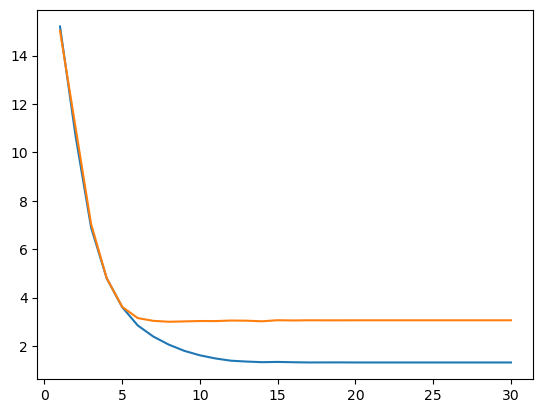

In [6]:
plt.figure(1)
plt.plot(sols[:, 0], sols[:, 3])
plt.plot(sols[:, 0], sols[:,4])

plt.show()

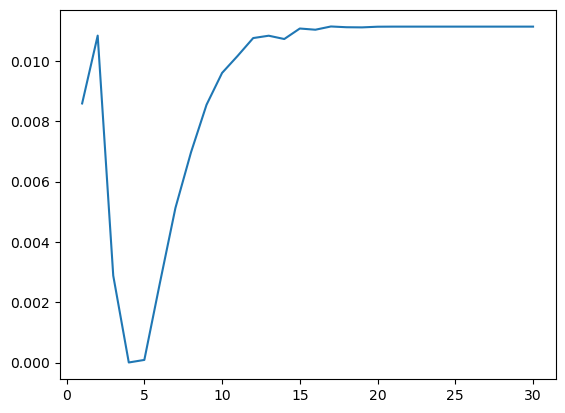

In [7]:
plt.figure(2)
plt.plot(sols[:, 0], abs(sols[:,2]- sols[:, 1] ))
plt.show()